In [21]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [22]:
def cleanDataSet():
    df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Flight%20Price%20Prediction/Clean_Dataset.csv')
    df.drop('Unnamed: 0',axis=1,inplace=True)
    return df 

def business():
    df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Flight%20Price%20Prediction/business.csv')
    return df 


def economy():
    df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Flight%20Price%20Prediction/economy.csv')
    return df 

In [28]:
cleanData_df = cleanDataSet()
business_df = business()
economy_df = economy()
cleanData_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [29]:
business_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [30]:
economy_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [31]:
cleanData_df.isnull().values.any(),business_df.isnull().values.any(),economy_df.isnull().values.any()

(False, False, False)

In [32]:
len(cleanData_df),len(business_df),len(economy_df),len(business_df)+len(economy_df) == len(cleanData_df)

(300153, 93487, 206774, False)

In [33]:
cleanData_df.replace(to_replace = "zero", value = 0,inplace=True) 
cleanData_df.replace(to_replace = "one", value = 1,inplace=True) 
cleanData_df['stops'].value_counts()

1              250863
0               36004
two_or_more     13286
Name: stops, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

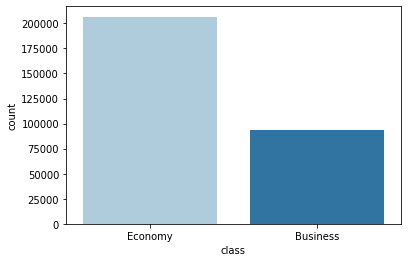

In [34]:
sns.set_palette("Paired")
sns.countplot(x='class',data=cleanData_df)

<AxesSubplot:xlabel='destination_city', ylabel='count'>

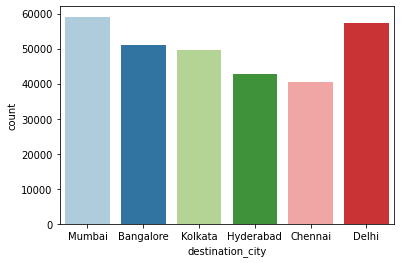

In [35]:
sns.countplot(x='destination_city',data=cleanData_df)

<AxesSubplot:xlabel='destination_city', ylabel='count'>

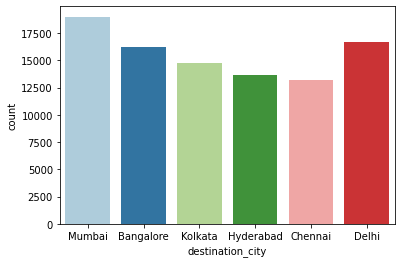

In [36]:
business_class = cleanData_df[cleanData_df['class'] == 'Business']
sns.countplot(x='destination_city',data=business_class)

In [37]:
cleanData_df = cleanDataSet()

X = cleanData_df[['price']]
y = cleanData_df['class']
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)
prediction = clf.predict(X)
Economy = 0
Business = 0

for i in range(len(prediction)):
    if prediction[i] == "Economy":
        Economy += 1
    else:
        Business += 1
        

print(Economy,Business)

true_economy = y.value_counts().values[0]

206957 93196


In [38]:
abs(Economy - true_economy),y.count(),(1- (abs(Economy - true_economy) /  y.count()))*100 

(291, 300153, 99.90304944478316)